In [8]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

wl = pd.read_csv("./plot/serpnf1.csv")

In [9]:
wl

,Participant,Time,Weight,BMI,Cholesterol,LDL,HDL,Triglyceride,HOMA-IR,Leptin,SERPINF1
0,2,1,84.80,31.40,5.2,3.2,1.8,0.60,1.48,17.00,9.328907
1,2,2,71.50,26.20,4.3,2.6,1.3,0.80,2.76,5.90,9.218614
2,2,3,71.00,NaN,NaN,NaN,NaN,NaN,NaN,17.00,9.267406
3,2,4,70.00,NaN,NaN,NaN,NaN,NaN,NaN,9.27,9.319368
4,2,5,71.50,NaN,NaN,NaN,NaN,NaN,NaN,13.40,9.287682
5,2,6,73.20,NaN,NaN,NaN,NaN,NaN,NaN,8.00,9.267685
6,2,7,72.00,26.63,4.7,2.9,1.5,0.60,1.60,8.75,9.233379
7,3,1,97.65,36.00,4.7,3.0,1.2,1.20,5.76,23.70,9.466347
8,3,2,85.80,30.00,3.4,2.0,0.9,0.70,4.60,6.69,9.371029
9,3,3,82.60,NaN,NaN,NaN,NaN,NaN,NaN,5.52,9.391156


In [32]:
first_wls = wl.loc[wl['Time'].isin([1,2])]
wl1 = wl.loc[wl['Time'].isin([1])].reset_index(drop=True)
wl2 = wl.loc[wl['Time'].isin([2])].reset_index(drop=True)
wl1

,Participant,Time,Weight,BMI,Cholesterol,LDL,HDL,Triglyceride,HOMA-IR,Leptin,SERPINF1
0,2,1,84.80,31.4,5.2,3.2,1.8,0.6,1.48,17.00,9.328907
1,3,1,97.65,36.0,4.7,3.0,1.2,1.2,5.76,23.70,9.466347
2,5,1,115.20,39.0,5.0,3.4,1.2,1.0,12.26,43.50,9.432924
3,6,1,90.05,30.4,5.5,3.4,1.5,1.4,5.84,24.60,9.430014
4,7,1,97.70,32.6,4.2,2.4,1.4,0.8,4.69,26.60,9.465149
5,8,1,96.60,34.0,4.0,2.9,1.6,0.8,NaN,31.90,9.518473
6,9,1,93.10,37.0,3.5,1.6,1.6,0.7,23.08,13.50,9.487384
7,1,1,87.45,33.6,4.0,2.4,1.0,2.7,6.18,40.50,9.501940
8,10,1,92.70,31.9,5.7,4.0,0.9,1.5,17.38,11.80,9.422457
9,11,1,96.70,33.0,4.3,2.0,1.6,0.9,6.22,20.60,9.469885


/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


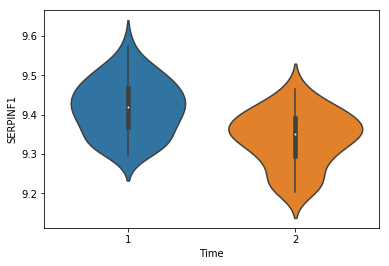

In [33]:
sns.violinplot(y="SERPINF1", x= "Time", split = True, data = first_wls)

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


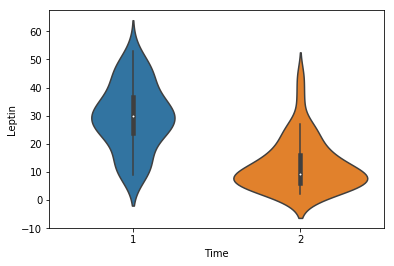

In [34]:
sns.violinplot(y="Leptin", x= "Time", split = True, data = first_wls)

In [51]:
diff = wl1.sub(wl2,fill_value=0.0)[["Weight","BMI","Cholesterol","LDL","HDL","Triglyceride","HOMA-IR","Leptin","SERPINF1"]]
diff.columns = ['D_' + str(col) for col in diff.columns]

wl_diff = pd.concat([wl1, diff], axis=1, join_axes=[wl1.index])

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


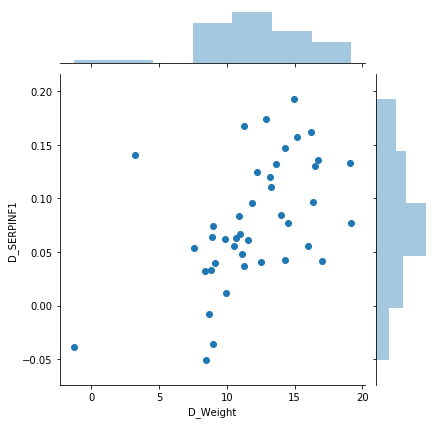

In [52]:
g = sns.jointplot(x="D_Weight",y="D_SERPINF1", data=wl_diff, kind = "scatter") # kind="kde")

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


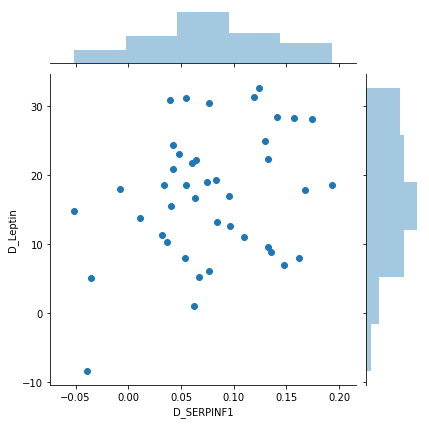

In [53]:
g = sns.jointplot(x="D_SERPINF1",y="D_Leptin", data=wl_diff, kind = "scatter") # kind="kde")

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


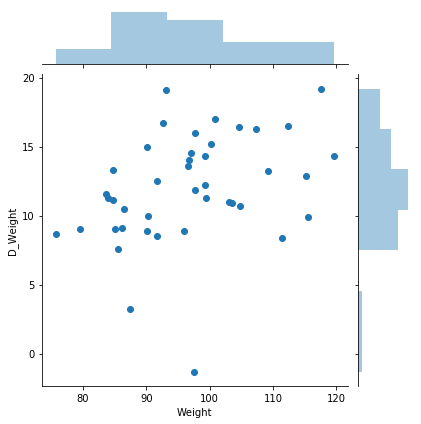

In [54]:
g = sns.jointplot(x="Weight",y="D_Weight", data=wl_diff, kind = "scatter")

In [39]:
y, X = dmatrices(, return_type='dataframe')

In [63]:
from statsmodels.formula.api import ols
mod = ols('tip_rate ~ C(sex) + C(day) + C(smoker) + C(time) + size', data=tips)

In [64]:
res = mod.fit()
table = sm.stats.anova_lm(res, typ=2)

In [65]:
#print(res.summary())
print(table)

             sum_sq     df         F    PR(>F)
C(sex)     0.003853    1.0  1.047333  0.307170
day        0.016399    3.0  1.485800  0.219064
C(smoker)  0.000674    1.0  0.183185  0.669041
C(time)    0.002946    1.0  0.800678  0.371802
size       0.019165    1.0  5.209381  0.023356
Residual   0.868246  236.0       NaN       NaN


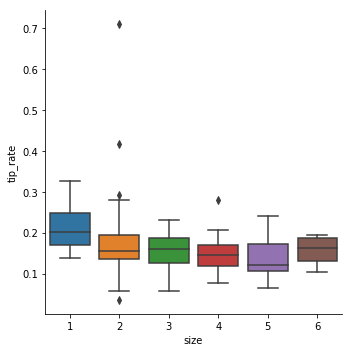

In [61]:
sns.catplot(x="size", y="tip_rate", kind="box",
            data=tips)

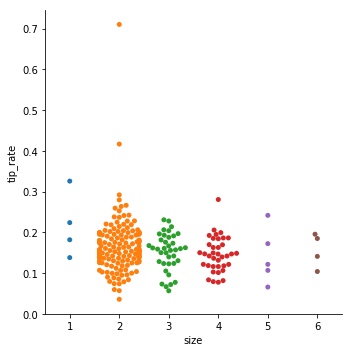

In [71]:
sns.catplot(x="size", y="tip_rate", kind="swarm",
            data=tips)

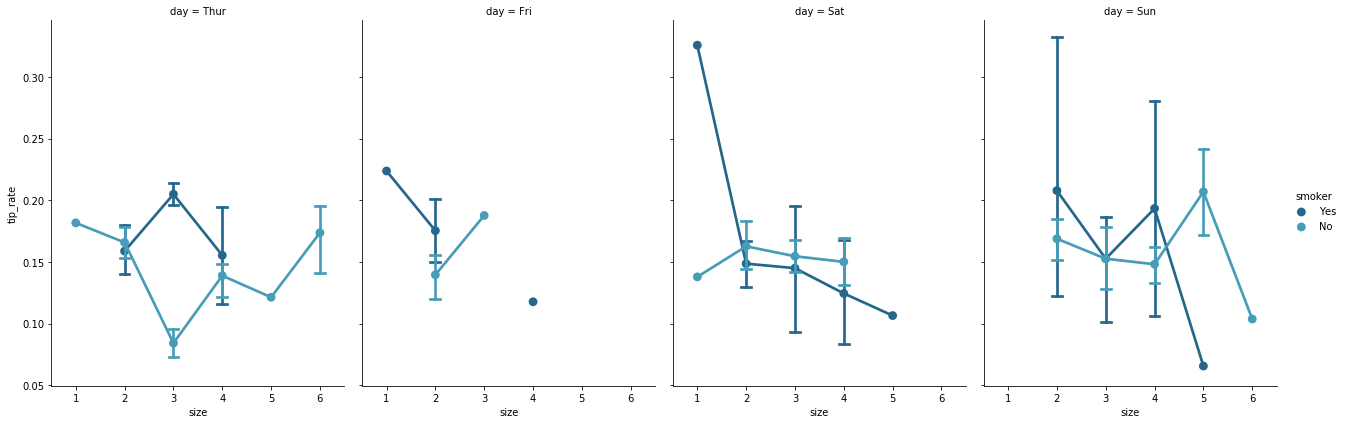

In [69]:
g = sns.catplot(x="size", y="tip_rate", hue="smoker", col="day",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=tips)

In [60]:
import pymc3 as pm

def our_mcmc(df,formula,family=pm.glm.families.Normal(),iterations=10000, tune=2000): 
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        pm.glm.GLM.from_formula(formula, df, family=family)

        # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
        start = pm.find_MAP()

        # Use the No-U-Turn Sampler
        step = pm.NUTS()
    
        # Calculate the trace
        trace = pm.sample(
            iterations, step, start, tune=tune,
            random_seed=42, progressbar=True)
    
        return trace



In [61]:
trace = our_mcmc(wl_diff,'D_SERPINF1 ~ D_Weight + D_Leptin')

logp = 49.641, ||grad|| = 708.03: 100%|██████████| 51/51 [00:00<00:00, 2408.00it/s]       
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, D_Leptin, D_Weight, Intercept]
Sampling 4 chains: 100%|██████████| 48000/48000 [00:31<00:00, 1513.87draws/s]
/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


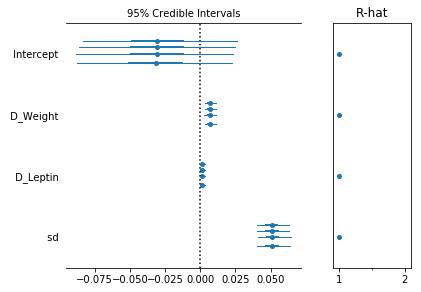

In [62]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f794ec38ef0>,
      dtype=object)

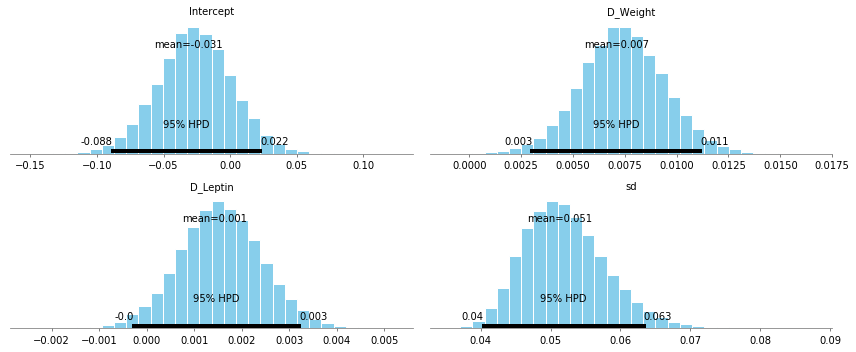

In [63]:
pm.plot_posterior(trace)

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


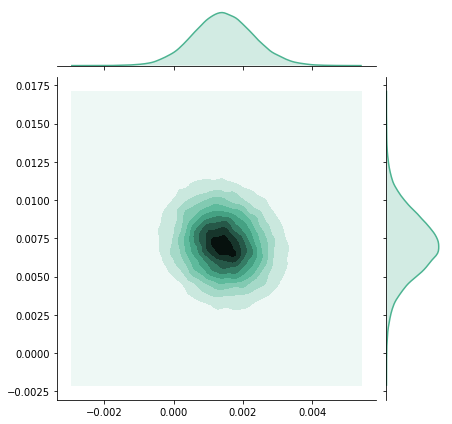

In [66]:
sns.jointplot(trace['D_Leptin'], trace['D_Weight'], kind="kde", color="#4CB391")

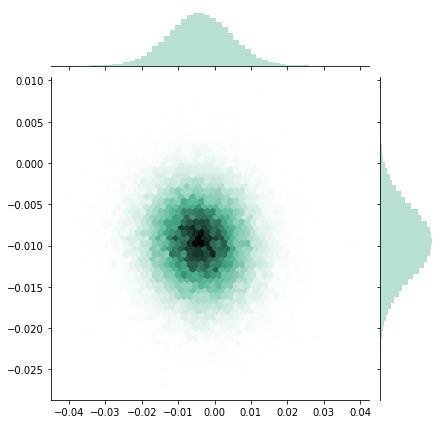

In [115]:
sns.jointplot(trace['C(smoker)[T.No]'], trace['size'], kind="hex", color="#4CB391")

In [93]:
trace = our_mcmc(tips,'tip_rate ~ C(sex) + C(day) + size',pm.glm.families.StudentT())

logp = 305.98, ||grad|| = 0.33203: 100%|██████████| 43/43 [00:00<00:00, 1609.15it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam, size, C(day)[T.Sun], C(day)[T.Sat], C(day)[T.Fri], C(sex)[T.Female], Intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:34<00:00, 1216.29draws/s]
The acceptance probability does not match the target. It is 0.8861114531101117, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8874035669970664, but should be close to 0.8. Try to increase the number of tuning steps.


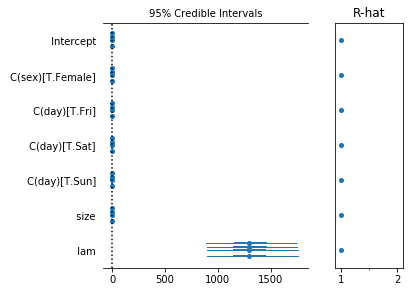

In [95]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bb16951d0>,
      dtype=object)

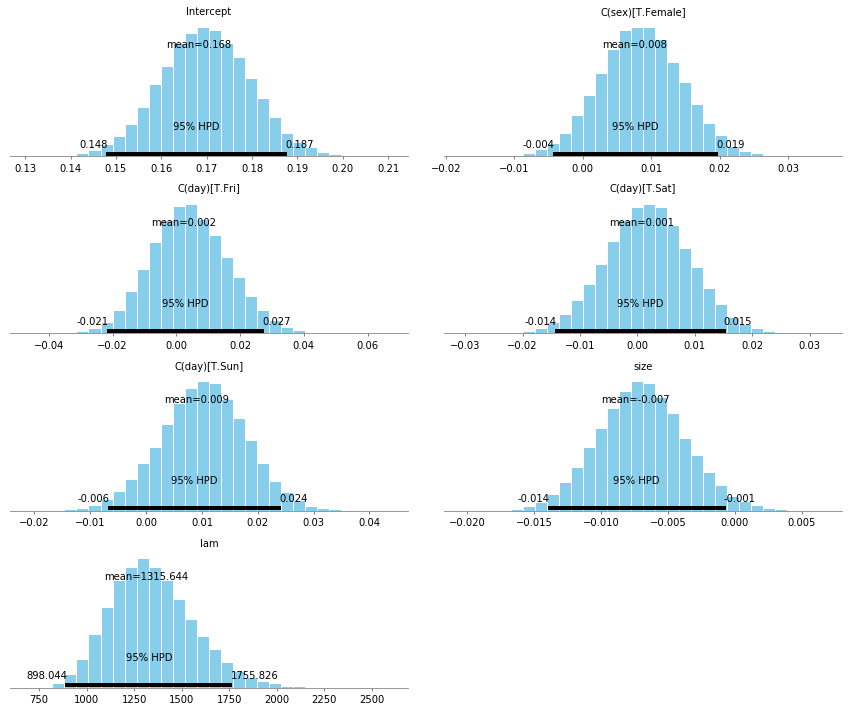

In [94]:
pm.plot_posterior(trace)

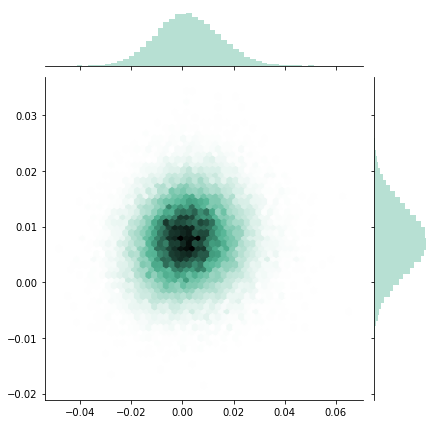

In [104]:
sns.jointplot(trace['C(day)[T.Fri]'], trace['C(sex)[T.Female]'], kind="hex", color="#4CB391")

In [99]:
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        pm.glm.GLM.from_formula('tip_rate ~ C(sex) + C(day) + size',tips,family=pm.glm.families.StudentT())
        basic_model

In [100]:
basic_model